### Problem 1 (a)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [103]:
data = pd.read_csv('College.csv')
data

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [104]:
data = pd.get_dummies(data, columns=['Private'], drop_first=True)
data

,Unnamed: 0,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


In [105]:
X = data.iloc[:, 2:]
Y = data['Apps']
Y.head()

0    1660
1    2186
2    1428
3     417
4     193
Name: Apps, dtype: int64

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/zl/s9nqhgd10mv_xtxmg_vxp1hh0000gn/T/ipykernel_16370/3839358222.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


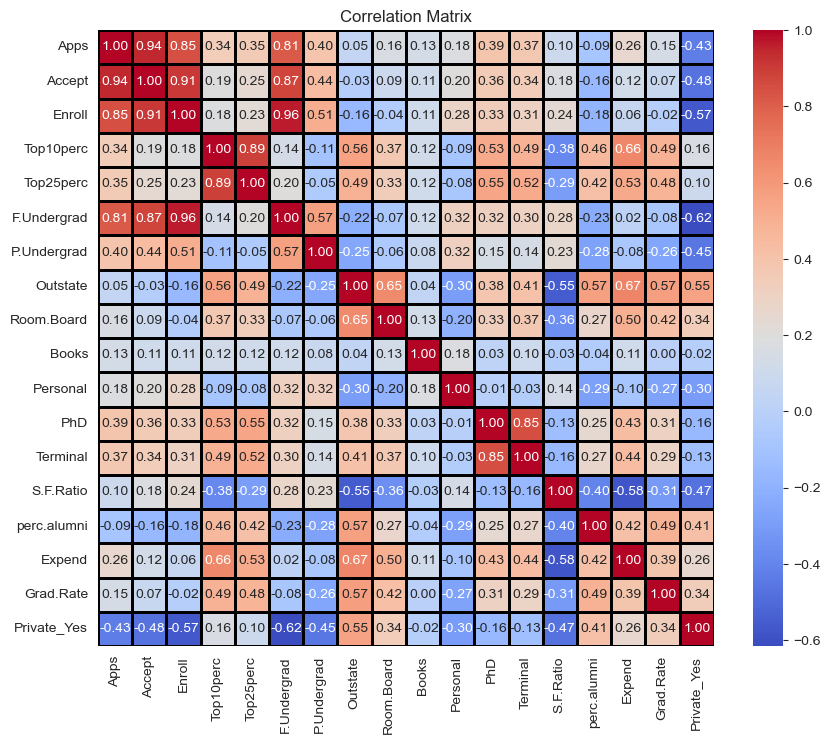

In [67]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,          # With annotation
            fmt=".2f",           # Formatting numbers
            cmap='coolwarm',     # Color map
            square=True,         # Squares will be square shaped
            linewidths=1,        # Space between squares
            linecolor='black')   # Line color between squares

plt.title('Correlation Matrix')
plt.show()

# Accept, Enroll, F.Undergrad, P.Undergrad, PhD, Terminal, Top25perc

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(699, 17) (78, 17) (699,) (78,)


In [107]:
linear_model = LinearRegression().fit(X_train, Y_train)
Y_pred = linear_model.predict(X_test)

print("MSE: ", mean_squared_error(Y_test, Y_pred))
print("R^2: ", linear_model.score(X_test, Y_test))

MSE:  1198657.8827501552
R^2:  0.8913897403655662


In [108]:
coefficients = linear_model.coef_
intercept = linear_model.intercept_

# Creating a DataFrame for visualization
coeff_summary = pd.DataFrame(coefficients, index=X_train.columns, columns=["Coefficient"])
coeff_summary.loc["Intercept"] = intercept  # Adding the intercept

print("Summary of Coefficients:")
print(coeff_summary)

Summary of Coefficients:
             Coefficient
Accept          1.612270
Enroll         -0.988152
Top10perc      50.702717
Top25perc     -14.944999
F.Undergrad     0.067535
P.Undergrad    -0.007131
Outstate       -0.079386
Room.Board      0.156488
Books          -0.023707
Personal        0.065593
PhD           -11.616929
Terminal       -0.834469
S.F.Ratio      20.313881
perc.alumni     0.293683
Expend          0.072673
Grad.Rate       9.054810
Private_Yes  -580.787882
Intercept    -469.509819


/var/folders/zl/s9nqhgd10mv_xtxmg_vxp1hh0000gn/T/ipykernel_16370/3563103178.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--k', color='red')


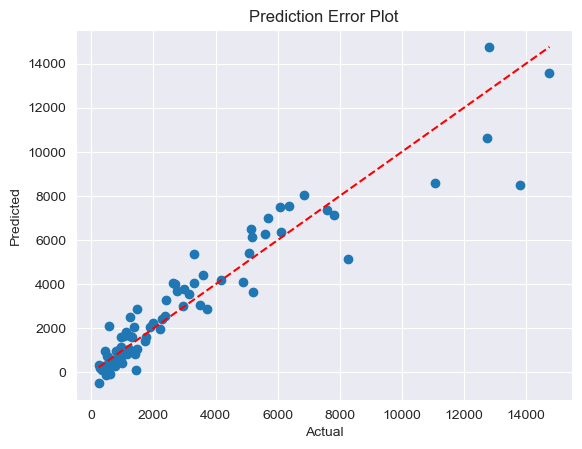

In [79]:
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--k', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction Error Plot')
plt.show()

### Problem 1 (b): Ridge Regression

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline

In [80]:
alphas = np.logspace(-6, 6, 13)

ridge_model = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=alphas, cv=10)
).fit(X_train, Y_train)

Y_pred = ridge_model.predict(X_test)

best_alpha = ridge_model.named_steps['ridgecv'].alpha_
print(f"Best alpha (λ) value chosen by 10-fold cross-validation: {best_alpha}\n")

# Performance Measurements
print("MSE: ", mean_squared_error(Y_test, Y_pred))
print("R^2: ", ridge_model.score(X_test, Y_test))

Best alpha (λ) value chosen by 10-fold cross-validation: 10.0

MSE:  1120786.7262785994
R^2:  0.8984456373351039


In [81]:
coefficients = ridge_model.named_steps['ridgecv'].coef_
intercept = ridge_model.named_steps['ridgecv'].intercept_

# Creating a DataFrame for visualization
coeff_summary = pd.DataFrame(coefficients, index=X_train.columns, columns=["Coefficient"])
coeff_summary.loc["Intercept"] = intercept  # Adding the intercept

print("Summary of Coefficients:")
print(coeff_summary)

Summary of Coefficients:
             Coefficient
Accept       3595.368450
Enroll       -403.227156
Top10perc     753.566709
Top25perc    -194.044477
F.Undergrad   191.475639
P.Undergrad    -6.519395
Outstate     -258.998096
Room.Board    190.841461
Books           1.117189
Personal       31.979661
PhD          -164.065108
Terminal      -27.169077
S.F.Ratio      76.441710
perc.alumni   -32.386353
Expend        393.656248
Grad.Rate     168.546180
Private_Yes  -260.130314
Intercept    2994.343348


/var/folders/zl/s9nqhgd10mv_xtxmg_vxp1hh0000gn/T/ipykernel_16370/3563103178.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--k', color='red')


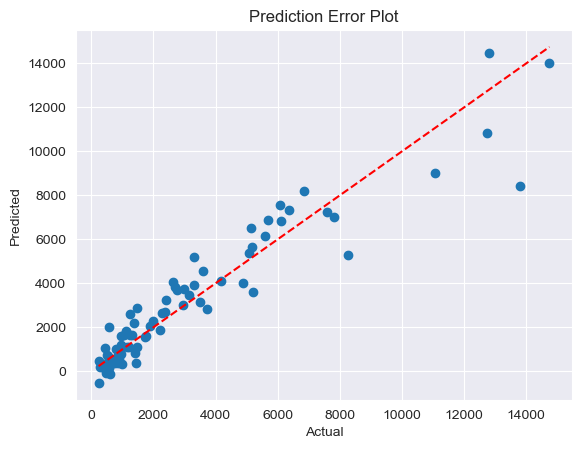

In [82]:
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--k', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction Error Plot')
plt.show()

### Problem 1 (c) Lasso Regression

In [20]:
from sklearn.linear_model import LassoCV

In [83]:
lasso_model = make_pipeline(
    StandardScaler(),
    LassoCV(cv=10, random_state=42)
).fit(X_train, Y_train)

# Making predictions on the test set
Y_pred = lasso_model.predict(X_test)

best_alpha = lasso_model.named_steps['lassocv'].alpha_
print(f"Optimal alpha (λ) chosen by 10-fold cross-validation: {best_alpha}")

# Performance Measurements
print("MSE: ", mean_squared_error(Y_test, Y_pred))
print("R^2: ", lasso_model.score(X_test, Y_test))

Optimal alpha (λ) chosen by 10-fold cross-validation: 3.709388889017989
MSE:  1172532.989017665
R^2:  0.8937569141288568


In [84]:
# Reporting the number of non-zero coefficients
non_zero_coefs = np.sum(lasso_model.named_steps['lassocv'].coef_ != 0)
print(f"Number of Non-Zero Coefficient Estimates: {non_zero_coefs}")

Number of Non-Zero Coefficient Estimates: 14


In [85]:
coefficients = lasso_model.named_steps['lassocv'].coef_
intercept = lasso_model.named_steps['lassocv'].intercept_

# Creating a DataFrame for better visualization
coeff_summary = pd.DataFrame(coefficients, index=X_train.columns, columns=["Coefficient"])
coeff_summary.loc["Intercept"] = intercept  # Adding the intercept

# Adding a column to indicate non-zero coefficients
coeff_summary['Non-Zero'] = coeff_summary['Coefficient'] != 0

# Displaying the summary
print("Summary of Coefficients:")
print(coeff_summary)

Summary of Coefficients:
             Coefficient  Non-Zero
Accept       3952.397102      True
Enroll       -738.707705      True
Top10perc     845.143423      True
Top25perc    -253.716131      True
F.Undergrad   195.946965      True
P.Undergrad    -0.000000     False
Outstate     -302.010807      True
Room.Board    165.875757      True
Books          -0.000000     False
Personal       38.404074      True
PhD          -179.099131      True
Terminal      -12.238365      True
S.F.Ratio      73.454311      True
perc.alumni    -0.000000     False
Expend        377.811847      True
Grad.Rate     146.369113      True
Private_Yes  -254.447525      True
Intercept    2994.343348      True


/var/folders/zl/s9nqhgd10mv_xtxmg_vxp1hh0000gn/T/ipykernel_16370/3563103178.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--k', color='red')


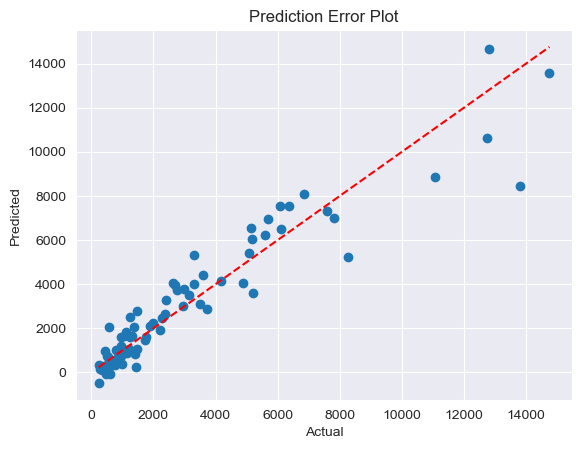

In [86]:
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--k', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction Error Plot')
plt.show()

### Problem 2 (a)

In [88]:
from sklearn.feature_selection import SequentialFeatureSelector

In [109]:
boston_data = pd.read_csv('Boston.csv')
boston_data

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [110]:
X = boston_data.iloc[:, 2:]
Y = boston_data['crim']
Y

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: crim, Length: 506, dtype: float64

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(455, 12) (51, 12) (455,) (51,)


### Forward Selection

In [126]:
forward_selector = SequentialFeatureSelector(
    LinearRegression(),
    n_features_to_select=7,
    direction='forward',
    scoring='neg_mean_squared_error',
    cv=10
).fit(X_train, Y_train)

# Transforming the dataset
X_forward_selected = forward_selector.transform(X_train)
# Getting the names of the selected features
selected_features_forward = X.columns[forward_selector.get_support()]

print(f"Selected features using forward stepwise selection: {selected_features_forward}")

Selected features using forward stepwise selection: Index(['zn', 'nox', 'dis', 'rad', 'tax', 'ptratio', 'medv'], dtype='object')


In [127]:
X_test_selected = X_test[selected_features_forward]

linear_model = LinearRegression().fit(X_forward_selected, Y_train)
Y_pred = linear_model.predict(X_test_selected)

print("MSE: ", mean_squared_error(Y_test, Y_pred))
print("R^2: ", linear_model.score(X_test_selected, Y_test))

MSE:  29.502535292053125
R^2:  0.43698367597968657


/Users/j/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/j/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Backward Selection

In [128]:
backward_selector = SequentialFeatureSelector(
    LinearRegression(),
    n_features_to_select=7,
    direction='backward',
    scoring='neg_mean_squared_error',
    cv=10
).fit(X_train, Y_train)

# Transforming the dataset
X_backward_selected = backward_selector.transform(X_train)
# Getting the names of the selected features
selected_features_backward = X.columns[backward_selector.get_support()]

print(f"Selected features using forward stepwise selection: {selected_features_backward}")

Selected features using forward stepwise selection: Index(['zn', 'nox', 'dis', 'rad', 'tax', 'ptratio', 'medv'], dtype='object')


In [129]:
X_test_selected = X_test[selected_features_backward]

linear_model = LinearRegression().fit(X_backward_selected, Y_train)
Y_pred = linear_model.predict(X_test_selected)

print("MSE: ", mean_squared_error(Y_test, Y_pred))
print("R^2: ", linear_model.score(X_test_selected, Y_test))

MSE:  29.502535292053125
R^2:  0.43698367597968657


/Users/j/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/j/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Lasso 

In [149]:
lasso_model = make_pipeline(
    StandardScaler(),
    LassoCV(cv=10, 
            random_state=42,
            alphas=[0.1]
            )
).fit(X_train, Y_train)

# Making predictions on the test set
Y_pred = lasso_model.predict(X_test)

best_alpha = lasso_model.named_steps['lassocv'].alpha_
print(f"Optimal alpha (λ) chosen by 10-fold cross-validation: {best_alpha}")

# Performance Measurements
print("MSE: ", mean_squared_error(Y_test, Y_pred))
print("R^2: ", lasso_model.score(X_test, Y_test))

Optimal alpha (λ) chosen by 10-fold cross-validation: 0.1
MSE:  28.643005605479793
R^2:  0.4533866474440137


In [150]:
coefficients = lasso_model.named_steps['lassocv'].coef_
intercept = lasso_model.named_steps['lassocv'].intercept_

# Creating a DataFrame for better visualization
coeff_summary = pd.DataFrame(coefficients, index=X_train.columns, columns=["Coefficient"])
coeff_summary.loc["Intercept"] = intercept  # Adding the intercept

# Adding a column to indicate non-zero coefficients
coeff_summary['Non-Zero'] = coeff_summary['Coefficient'] != 0

# Displaying the summary
non_zero_coefs = np.sum(lasso_model.named_steps['lassocv'].coef_ != 0)
print(f"Number of Non-Zero Coefficient Estimates: {non_zero_coefs}")
print("Summary of Coefficients:")
print(coeff_summary)

Number of Non-Zero Coefficient Estimates: 10
Summary of Coefficients:
           Coefficient  Non-Zero
zn            0.726646      True
indus        -0.190490      True
chas         -0.186434      True
nox          -0.508075      True
rm            0.206636      True
age           0.000000     False
dis          -1.394603      True
rad           4.652784      True
tax          -0.000000     False
ptratio      -0.342101      True
lstat         0.603621      True
medv         -1.548871      True
Intercept     3.676738      True


### Ridge

In [58]:
alphas = np.logspace(-6, 6, 13)

ridge_model = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=alphas, cv=10)
).fit(X_train, Y_train)

Y_pred = ridge_model.predict(X_test)

best_alpha = ridge_model.named_steps['ridgecv'].alpha_
print(f"Best alpha (λ) value chosen by 10-fold cross-validation: {best_alpha}\n")

# Performance Measurements
print("MSE: ", mean_squared_error(Y_test, Y_pred))
print("R^2: ", ridge_model.score(X_test, Y_test))

Best alpha (λ) value chosen by 10-fold cross-validation: 100.0

MSE:  28.954559588426086
R^2:  0.4474410574641736


In [59]:
coefficients = ridge_model.named_steps['ridgecv'].coef_
intercept = ridge_model.named_steps['ridgecv'].intercept_

# Creating a DataFrame for visualization
coeff_summary = pd.DataFrame(coefficients, index=X_train.columns, columns=["Coefficient"])
coeff_summary.loc["Intercept"] = intercept  # Adding the intercept

print("Summary of Coefficients:")
print(coeff_summary)

Summary of Coefficients:
           Coefficient
zn            0.524309
indus        -0.239173
chas         -0.255770
nox          -0.119397
rm            0.260188
age           0.206337
dis          -0.929950
rad           2.824419
tax           1.221921
ptratio      -0.060761
lstat         0.848133
medv         -1.077381
Intercept     3.676738


### Problem 2 (b)

In [155]:
import warnings
warnings.filterwarnings('ignore')

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [166]:
# Setting up cross-validation
# Hyperparameters to tune
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10], 'max_features': ['auto', 'sqrt']}
gb_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [1, 2, 3, 4, 5]}

# Grid search with cross-validation for Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, Y_train)

# Grid search with cross-validation for Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, Y_train)

# Predicting using the best models
rf_pred = rf_grid_search.best_estimator_.predict(X_test)
gb_pred = gb_grid_search.best_estimator_.predict(X_test)

# Mean Squared Error and R^2 score for the best Rf model
rf_mse = mean_squared_error(Y_test, rf_pred)
rf_r2 = r2_score(Y_test, rf_pred)

# Mean Squared Error and R^2 score for the best Gb model
gb_mse = mean_squared_error(Y_test, gb_pred)
gb_r2 = r2_score(Y_test, gb_pred)

print(f"Random Forest - Best Params: {rf_grid_search.best_params_}")
print(f"Random Forest - Mean Squared Error: {rf_mse}, R^2 Score: {rf_r2}")

print(f"Gradient Boosting - Best Params: {gb_grid_search.best_params_}")
print(f"Gradient Boosting - Mean Squared Error: {gb_mse}, R^2 Score: {gb_r2}")

Random Forest - Best Params: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Random Forest - Mean Squared Error: 13.570226933604177, R^2 Score: 0.7410304162457091
Gradient Boosting - Best Params: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}
Gradient Boosting - Mean Squared Error: 16.611839685844526, R^2 Score: 0.6829853155820742


In [164]:
rf_grid_search.cv_results_

{'mean_fit_time': array([0.00034199, 0.00026922, 0.00028887, 0.05329556, 0.15417824,
        0.15277624, 0.00028181, 0.00021892, 0.00030394, 0.04473634,
        0.07260547, 0.10770812, 0.0002521 , 0.00021405, 0.00021358,
        0.04646778, 0.09197545, 0.13761201]),
 'std_fit_time': array([1.17038279e-04, 6.31735276e-05, 5.57021730e-05, 1.96831754e-03,
        5.69385400e-02, 1.11166848e-03, 6.65357869e-05, 3.30155933e-06,
        1.54872672e-04, 8.45979992e-03, 7.42283425e-04, 7.05743345e-04,
        3.99029232e-05, 2.16107735e-06, 4.77885049e-06, 2.13654497e-04,
        4.03165437e-04, 4.73272556e-04]),
 'mean_score_time': array([0.        , 0.        , 0.        , 0.00312819, 0.00704627,
        0.00739775, 0.        , 0.        , 0.        , 0.00278325,
        0.00424514, 0.00584278, 0.        , 0.        , 0.        ,
        0.00279822, 0.00478864, 0.00667062]),
 'std_score_time': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.59936116e-04,
        2.42615013e-03, 3.99

In [165]:
gb_grid_search.cv_results_


{'mean_fit_time': array([0.04972925, 0.09854035, 0.14959755, 0.06220341, 0.12376704,
        0.18481274, 0.07531157, 0.14901466, 0.22472248, 0.04999409,
        0.09917111, 0.14920101, 0.06311808, 0.12591143, 0.19136944,
        0.07589703, 0.15379982, 0.23774281, 0.05028229, 0.10436077,
        0.14892626, 0.06373763, 0.12666316, 0.19181323, 0.07675223,
        0.15544415, 0.23040557]),
 'std_fit_time': array([0.0003239 , 0.00054792, 0.00238319, 0.00048025, 0.00082169,
        0.00118083, 0.00109315, 0.00182634, 0.00339734, 0.00025199,
        0.00030931, 0.000743  , 0.00013147, 0.00075349, 0.00345487,
        0.0004097 , 0.00281189, 0.00901045, 0.00033527, 0.00626886,
        0.00121687, 0.00043605, 0.00059919, 0.00301843, 0.00026013,
        0.00528141, 0.00168094]),
 'mean_score_time': array([0.00090156, 0.00104671, 0.00113473, 0.00090942, 0.00114155,
        0.00120301, 0.00097122, 0.00114856, 0.00130267, 0.00089316,
        0.00100217, 0.0011713 , 0.00094099, 0.00109501, 0.001245